# !!!Note

ID, Gender, Customer Type, Age, Type of Travel, flight distant,Baggage handling,Gate location,
Online support,Ease of Online booking,Online boarding

These columns are not in use

### Problem Definition:
How different variables determine if the customer is satisfy/dissatisfy with the service provided by America Airline. 


### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Setup : Import the Dataset

Dataset on US Airline passenger satisfaction survey : Attached file `satisfaction_v2.csv`     

In [2]:
satisfactionData = pd.read_csv('satisfaction.csv')
satisfactionData.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
satisfactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

Let's list down all our observations from the super-quick glance of the dataset, as above.
* There are `24` variables/features/columns and `129880` observations/samples/rows in the dataset.   
* The response variable seems to be `satisfaction_v2`, while the remaining 18 are most likely predictors. Except ID, Gender, Customer Type, Age and Type of Travel.     
* There are `16` variables identified as `int64` by default, and it seems they are indeed Numeric.
* There are `1` variables identified as `float64` by default, and it seems they are indeed Numeric.
* There are `1` variables identified as `object` by default, and they are most likely Categorical.  
* None of the variables/features seem to have any missing value.

---
## Exploratory Data Analysis

Let us start by exploring the response variable `satisfaction_v2`, the one we are supposed to predict at the end of the day.

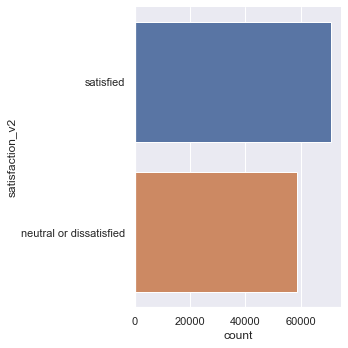

In [4]:
sb.catplot(y = 'satisfaction_v2', data = satisfactionData, kind = "count")

In [5]:
countG, countB = satisfactionData['satisfaction_v2'].value_counts()
print("Ratio of classes is satisfied : neutral or dissatisfied = ", countG, ":", countB)

Ratio of classes is satisfied : neutral or dissatisfied =  71087 : 58793


##### Quickly check out the Numeric and Categorical predictors

In [6]:
# Numeric Predictors
satisfactionData[['Seat comfort','Departure/Arrival time convenient',
                  'Food and drink','Inflight wifi service','Inflight entertainment',
                  'On-board service','Leg room service','Checkin service','Cleanliness',
                 'Departure Delay in Minutes','Arrival Delay in Minutes',]].describe()

,Seat comfort,Departure/Arrival time convenient,Food and drink,Inflight wifi service,Inflight entertainment,On-board service,Leg room service,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,2.838597,2.990645,2.851994,3.249130,3.383477,3.465075,3.485902,3.340807,3.705759,14.713713,15.091129
std,1.392983,1.527224,1.443729,1.318818,1.346059,1.270836,1.292226,1.260582,1.151774,38.071126,38.465650
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,0.000000,0.000000
50%,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,0.000000,0.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,12.000000,13.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


##### We found out that there are null value for "Arrival Delay in Minutes", we decide to replace null with 0.

In [7]:
cleanArrivalDelay = pd.DataFrame(satisfactionData[['Arrival Delay in Minutes']])
cleanArrivalDelay = cleanArrivalDelay['Arrival Delay in Minutes'].fillna(0)

cleanArrivalDelay.describe() #count has now updated from 129487 to 129880

count    129880.000000
mean         15.045465
std          38.416353
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

##### Also did a check on the ID to ensure that they are all unique.

In [8]:
# IDs of Satisfaction Data in the Dataset
print("Unique IDs of Satisfaction Data :", len(satisfactionData["id"].unique()))

Unique IDs of Satisfaction Data : 129880


##### Categorical Predictors

In [9]:
# Categorical Predictors
satisfactionData['Class'].describe()

count       129880
unique           3
top       Business
freq         62160
Name: Class, dtype: object

#### Analysing the Variable


* {"Seat comfort","Departure/Arrival time convenient","Food and drink","Inflight wifi service","Inflight entertainment", "On-board service", "Leg room service", "Checkin service","Cleanliness","Online boarding"} has 5 levels, 0 as lowest and 5 being the highest.

* {"Departure Delay in Minutes","Arrival Delay in Minutes"} are in minutes. Both have 0 as the lowest ,1592 and 1584 as the highest respectively.



### Predictors corresponding to the Satisfaction Data

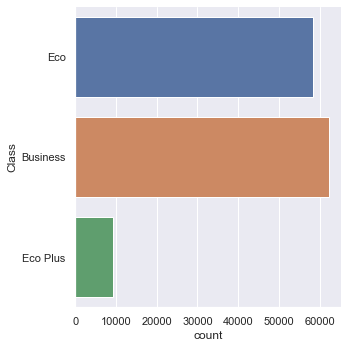

In [10]:
# Flight Class
sb.catplot(y = 'Class', data = satisfactionData, kind = "count")

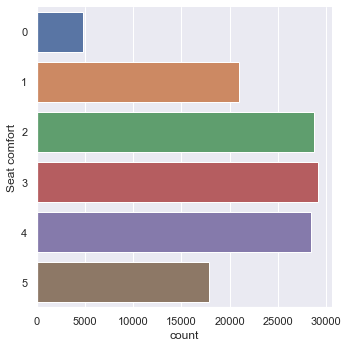

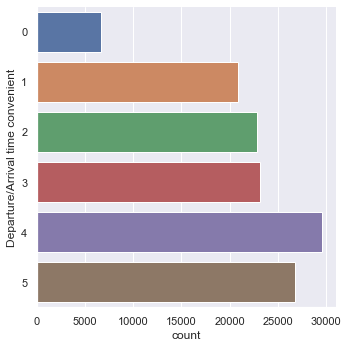

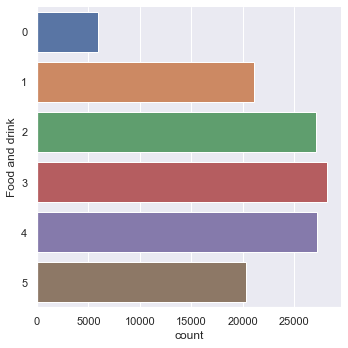

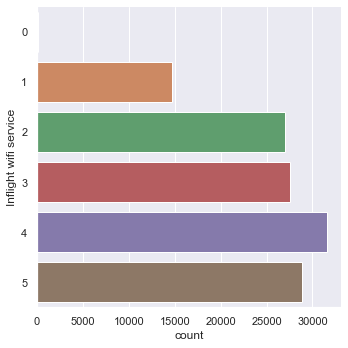

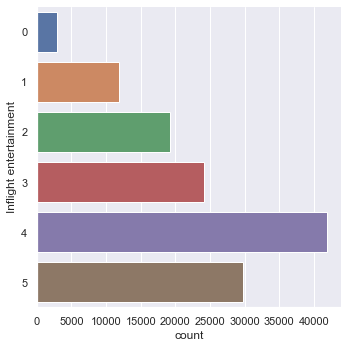

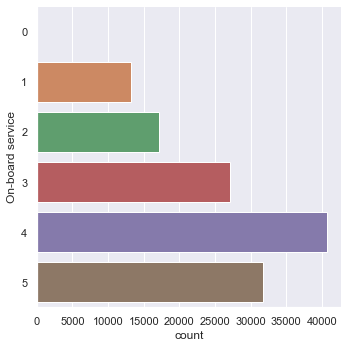

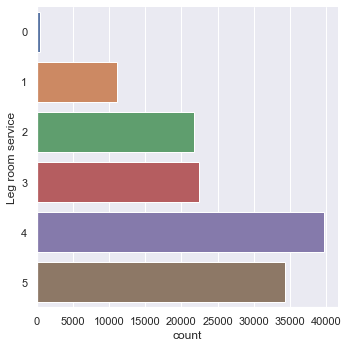

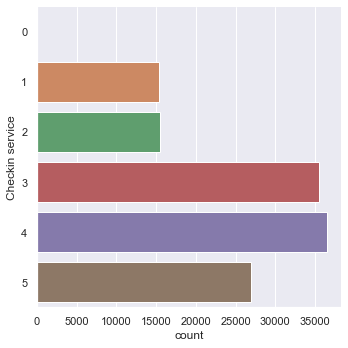

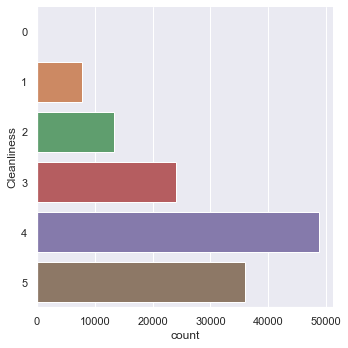

In [11]:
# list of columns ['Seat comfort','Departure/Arrival time convenient','Food and drink',
#'Inflight wifi service','Inflight entertainment','On-board service','Leg room service',
#'Checkin service','Cleanliness']

sb.catplot(y = 'Seat comfort', data = satisfactionData, kind = "count")
sb.catplot(y = 'Departure/Arrival time convenient', data = satisfactionData, kind = "count")
sb.catplot(y = 'Food and drink', data = satisfactionData, kind = "count")
sb.catplot(y = 'Inflight wifi service', data = satisfactionData, kind = "count")
sb.catplot(y = 'Inflight entertainment', data = satisfactionData, kind = "count")
sb.catplot(y = 'On-board service', data = satisfactionData, kind = "count")
sb.catplot(y = 'Leg room service', data = satisfactionData, kind = "count")
sb.catplot(y = 'Checkin service', data = satisfactionData, kind = "count")
sb.catplot(y = 'Cleanliness', data = satisfactionData, kind = "count")

Observation from the distribution:

* The majority of the data distributes among grade 3 & 4.

* At first glance of the graph, "Inflight wifi service" variables seem to show that the '0' grade has no distribution. However, after looking into the raw data, we observed that this is due to the small size of the data that is grade '0'. Subsequently, we can observe that the '0' grade tend to have the smallest distribution.


### Relationship with Satisfaction Data

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='satisfaction_v2'>

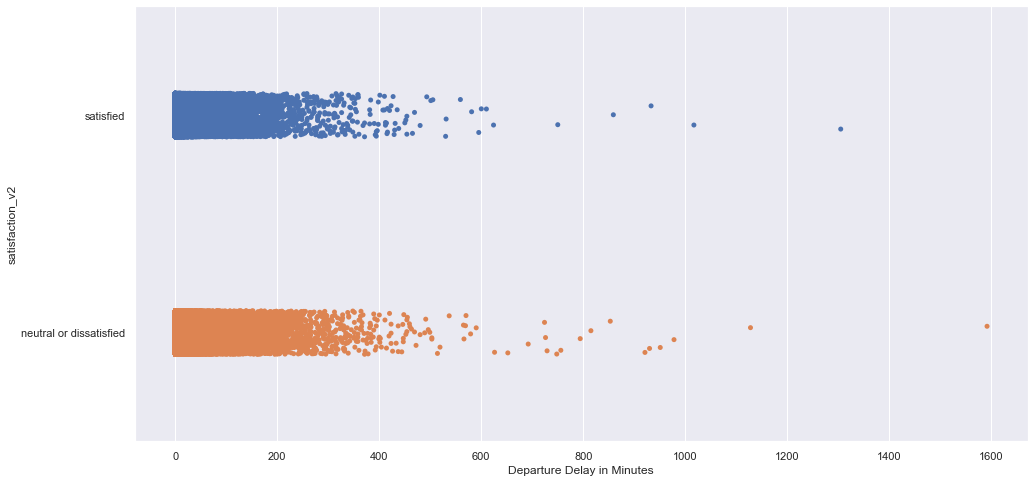

In [12]:
# satisfaction_v2 vs Departure Delay in Minutes
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Departure Delay in Minutes', y = 'satisfaction_v2', data = satisfactionData)

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='satisfaction_v2'>

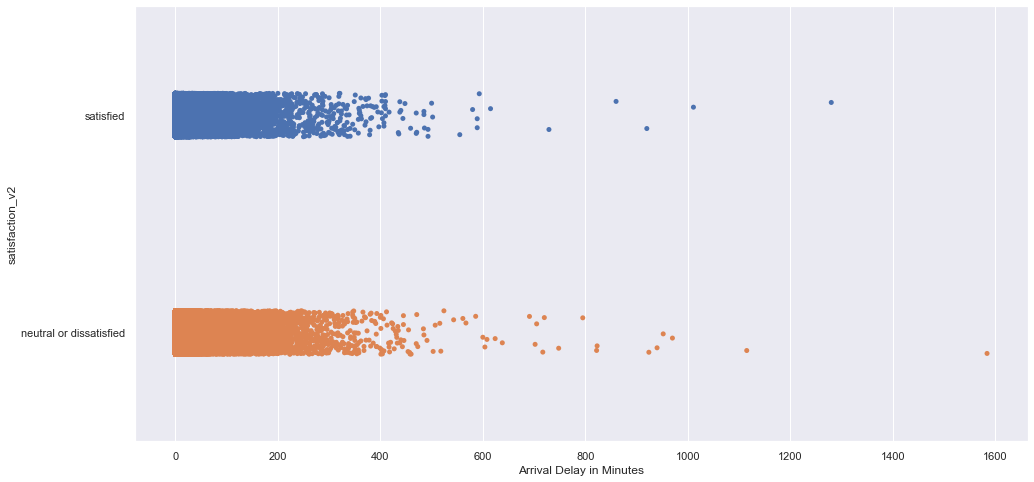

In [13]:
# satisfaction_v2 vs Arrival Delay in Minutes
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Arrival Delay in Minutes', y = 'satisfaction_v2', data = satisfactionData)

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

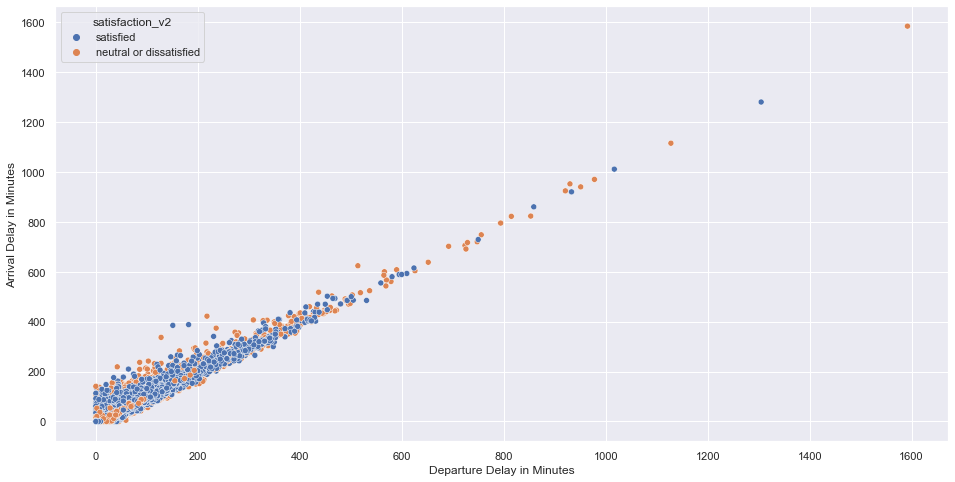

In [24]:
# satisfaction_v2 vs Departure Delay in Minutes AND Arrival Delay in Minutes 
f = plt.figure(figsize=(16, 8))
sb.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', hue = 'satisfaction_v2', data = satisfactionData)

<AxesSubplot:xlabel='Seat comfort', ylabel='satisfaction_v2'>

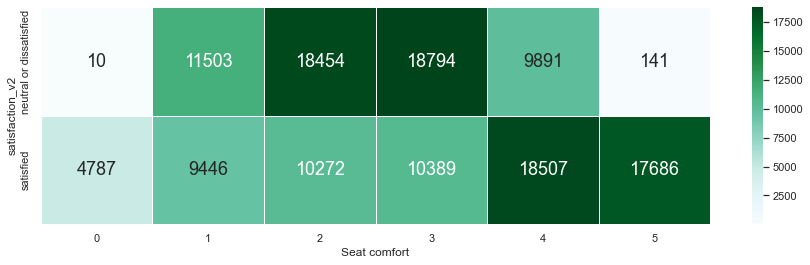

In [15]:
# satisfaction_v2 vs Seat comfort
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Seat comfort']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

### Observation
seat comfort 4/5 tend to be satisfied while
seat comfort 2/3 tend to be unsatisfied

<AxesSubplot:xlabel='Departure/Arrival time convenient', ylabel='satisfaction_v2'>

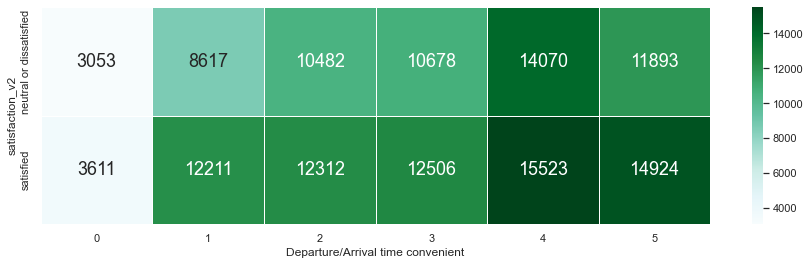

In [16]:
# satisfaction_v2 vs Departure/Arrival time convenient
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Departure/Arrival time convenient']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Food and drink', ylabel='satisfaction_v2'>

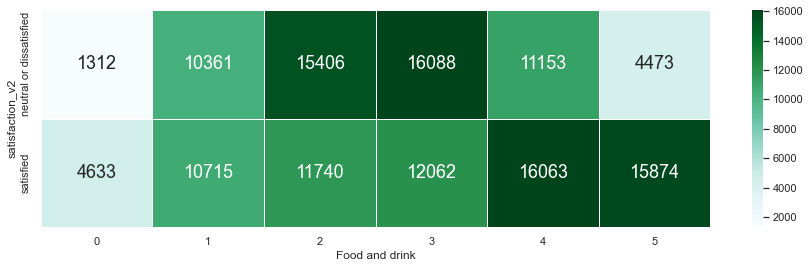

In [17]:
# satisfaction_v2 vs Food and drink
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Food and drink']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Inflight wifi service', ylabel='satisfaction_v2'>

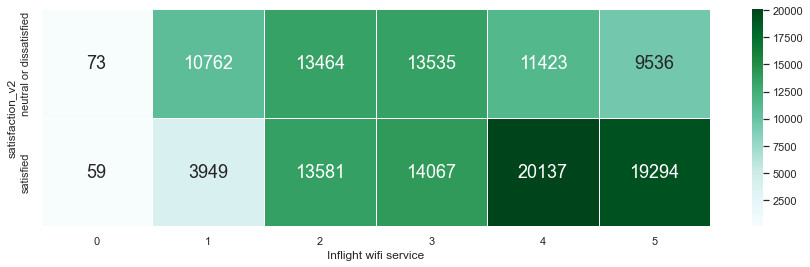

In [18]:
# satisfaction_v2 vs Inflight wifi service
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Inflight wifi service']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Inflight entertainment', ylabel='satisfaction_v2'>

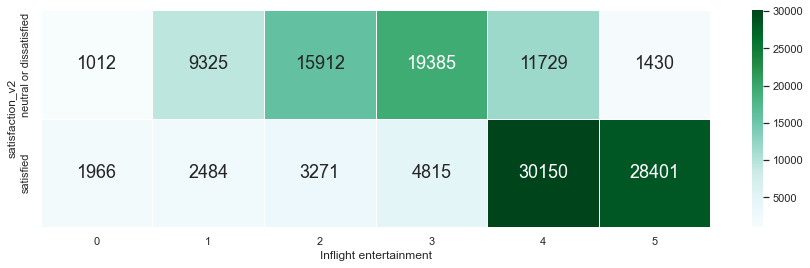

In [19]:
# satisfaction_v2 vs Inflight entertainment
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Inflight entertainment']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='On-board service', ylabel='satisfaction_v2'>

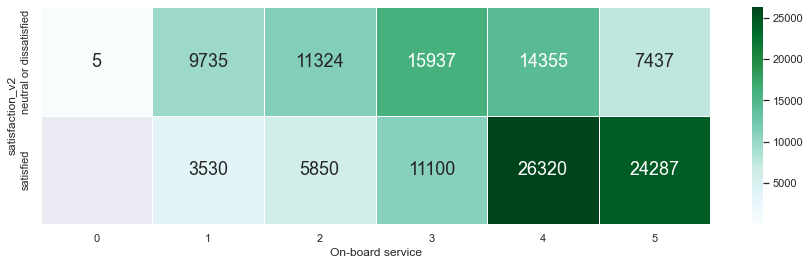

In [20]:
# satisfaction_v2 vs On-board service
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'On-board service']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Leg room service', ylabel='satisfaction_v2'>

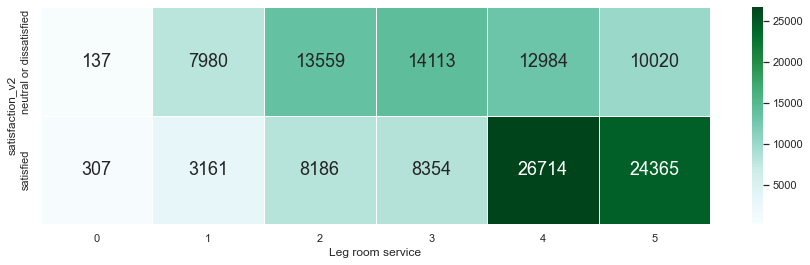

In [21]:
# satisfaction_v2 vs Leg room service
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Leg room service']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Checkin service', ylabel='satisfaction_v2'>

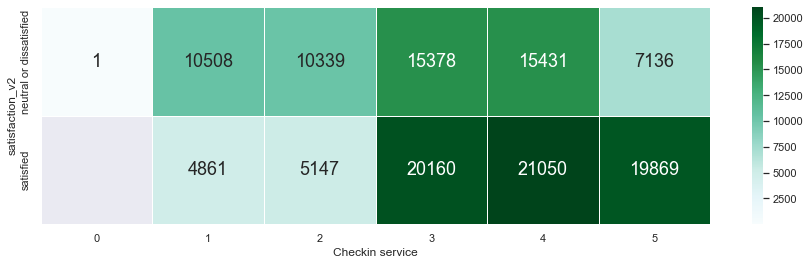

In [22]:
# satisfaction_v2 vs Checkin service
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Checkin service']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Cleanliness', ylabel='satisfaction_v2'>

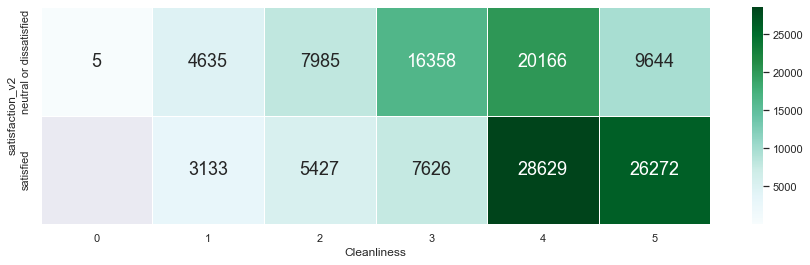

In [23]:
# satisfaction_v2 vs Cleanliness
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Cleanliness']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

### Complex Relationships with Satisfaction 